## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [2]:
model_dir = '/home/drevital/cs_video_processor/models/jun22_a'
im_dir = '/home/drevital/obstacles_classification_datasets/test'
im_name = '1038_71961_0.51_.51_2022-02-01--03-13-41__unknown_.jpg'
im_height = 200
im_width = 600

## Load Trained Model

In [3]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [4]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2RGB)  

## Display Images

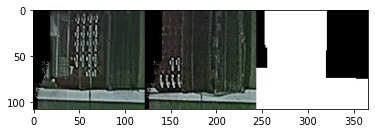

In [5]:
plt.imshow(im)
plt.show() 

## Prepare Images for Prediction - Try Separate Resize

In [6]:
imarr = np.array(im, dtype='float32')
h = imarr.shape[0]
w = imarr.shape[1]

im1 = imarr[:, :w//3]
im2 = imarr[:, w//3:(w*2)//3] 
im3 = imarr[:, (w*2)//3:] 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)

im1 = cv2.resize(im1, dsize=(200, 200), interpolation=cv2.INTER_LANCZOS4)
im2 = cv2.resize(im2, dsize=(200, 200), interpolation=cv2.INTER_LANCZOS4)
im3 = cv2.resize(im3, dsize=(200, 200), interpolation=cv2.INTER_NEAREST)

# Translate original rabge (0-255) to trained range (0.0-1.0)
im1 /= 255.0
im2 /= 255.0
im3 /= 255.0

orig_im1 = im1
orig_im2 = im2
orig_im3 = im3

# Reshape to match model's input shape
im1 = im1.reshape(1, im1.shape[0], im1.shape[1], 3)
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], 3)
im3 = im3.reshape(1, im3.shape[0], im3.shape[1], 1)

## Display image components

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


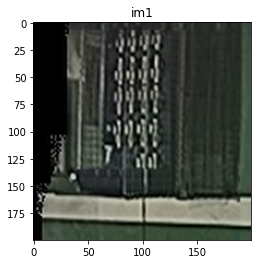

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


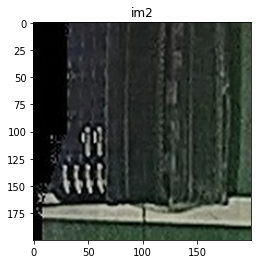

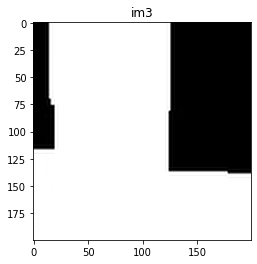

In [7]:
plt.imshow(orig_im1)
plt.title('im1')
plt.show() 

plt.imshow(orig_im2)
plt.title('im2')
plt.show() 

plt.imshow(orig_im3, cmap='gray', vmin=0, vmax=1)
plt.title('im3')
plt.show() 

## Predict 

In [8]:
prediction = model.predict([im1, im2, im3])

1/1 [==============================] - 0s 495ms/step


In [9]:
prediction

array([[0.48917708]], dtype=float32)